# Plotting linearly polarized spectra from BEM, with $\epsilon_b = 1$
    10/25/18

In [1]:
import numpy as np
import scipy.optimize as opt
import scipy.io as sio
import scipy.constants as con

# import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
hbar = con.physical_constants['Planck constant over 2 pi in eV s'][0]
c = con.physical_constants['speed of light in vacuum'][0]*1e2 #cm/m
nm = 1e-7

In [3]:
## load matlab spectra with 
## sio.loadmat('fields_from_BEM')
path_to_BEM_spectra = '/Users/chair/Documents/MATLAB/102418/curly_rod_spectra_JC_epsb1'
loaded_spectra = sio.loadmat(path_to_BEM_spectra)

In [4]:
# loaded_spectra.keys()
loaded_spectra['long_mode'].shape

(150, 3)

In [5]:
long_sigma = loaded_spectra['long_mode'][:,1]*(1e-14) ## cm^2/nm^2
trans_sigma = loaded_spectra['trans_mode'][:,1]*(1e-14)

long_lambdas = loaded_spectra['long_mode'][:,0]
trans_lambdas = loaded_spectra['trans_mode'][:,0]

long_hbarws = hbar*c*2*np.pi/(long_lambdas*1e-7) 
trans_hbarws = hbar*c*2*np.pi/(trans_lambdas*1e-7) 


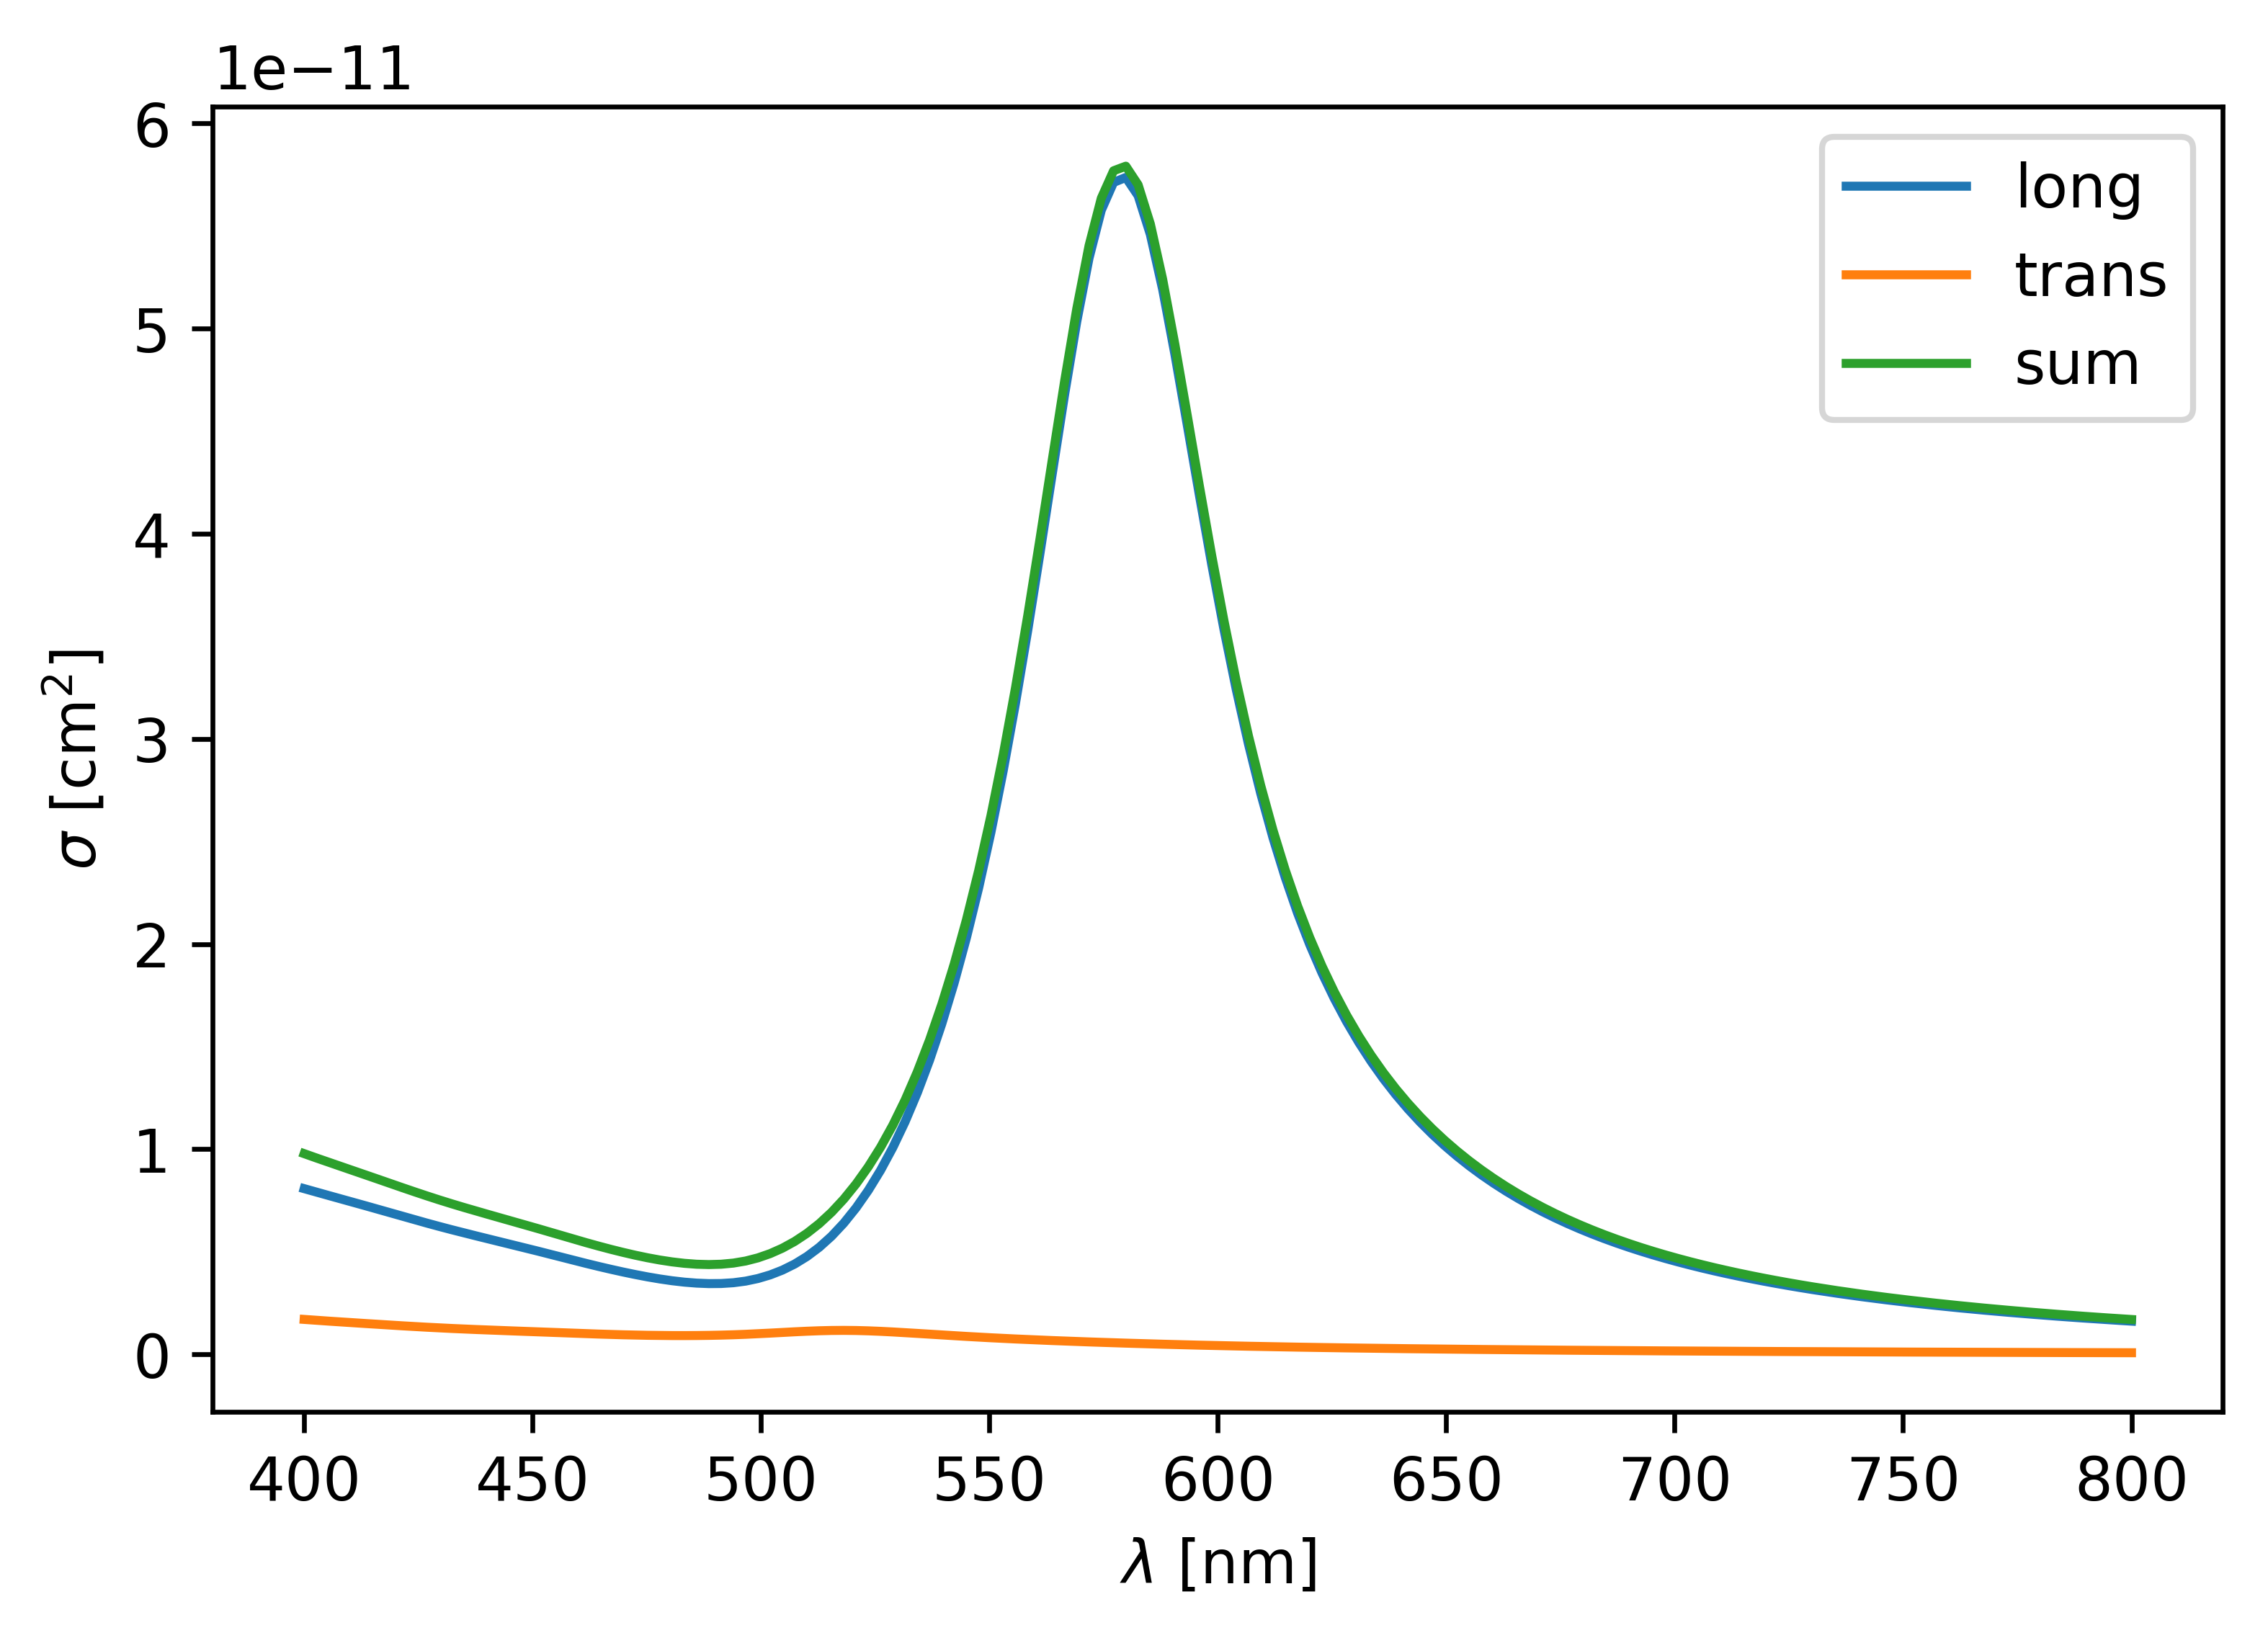

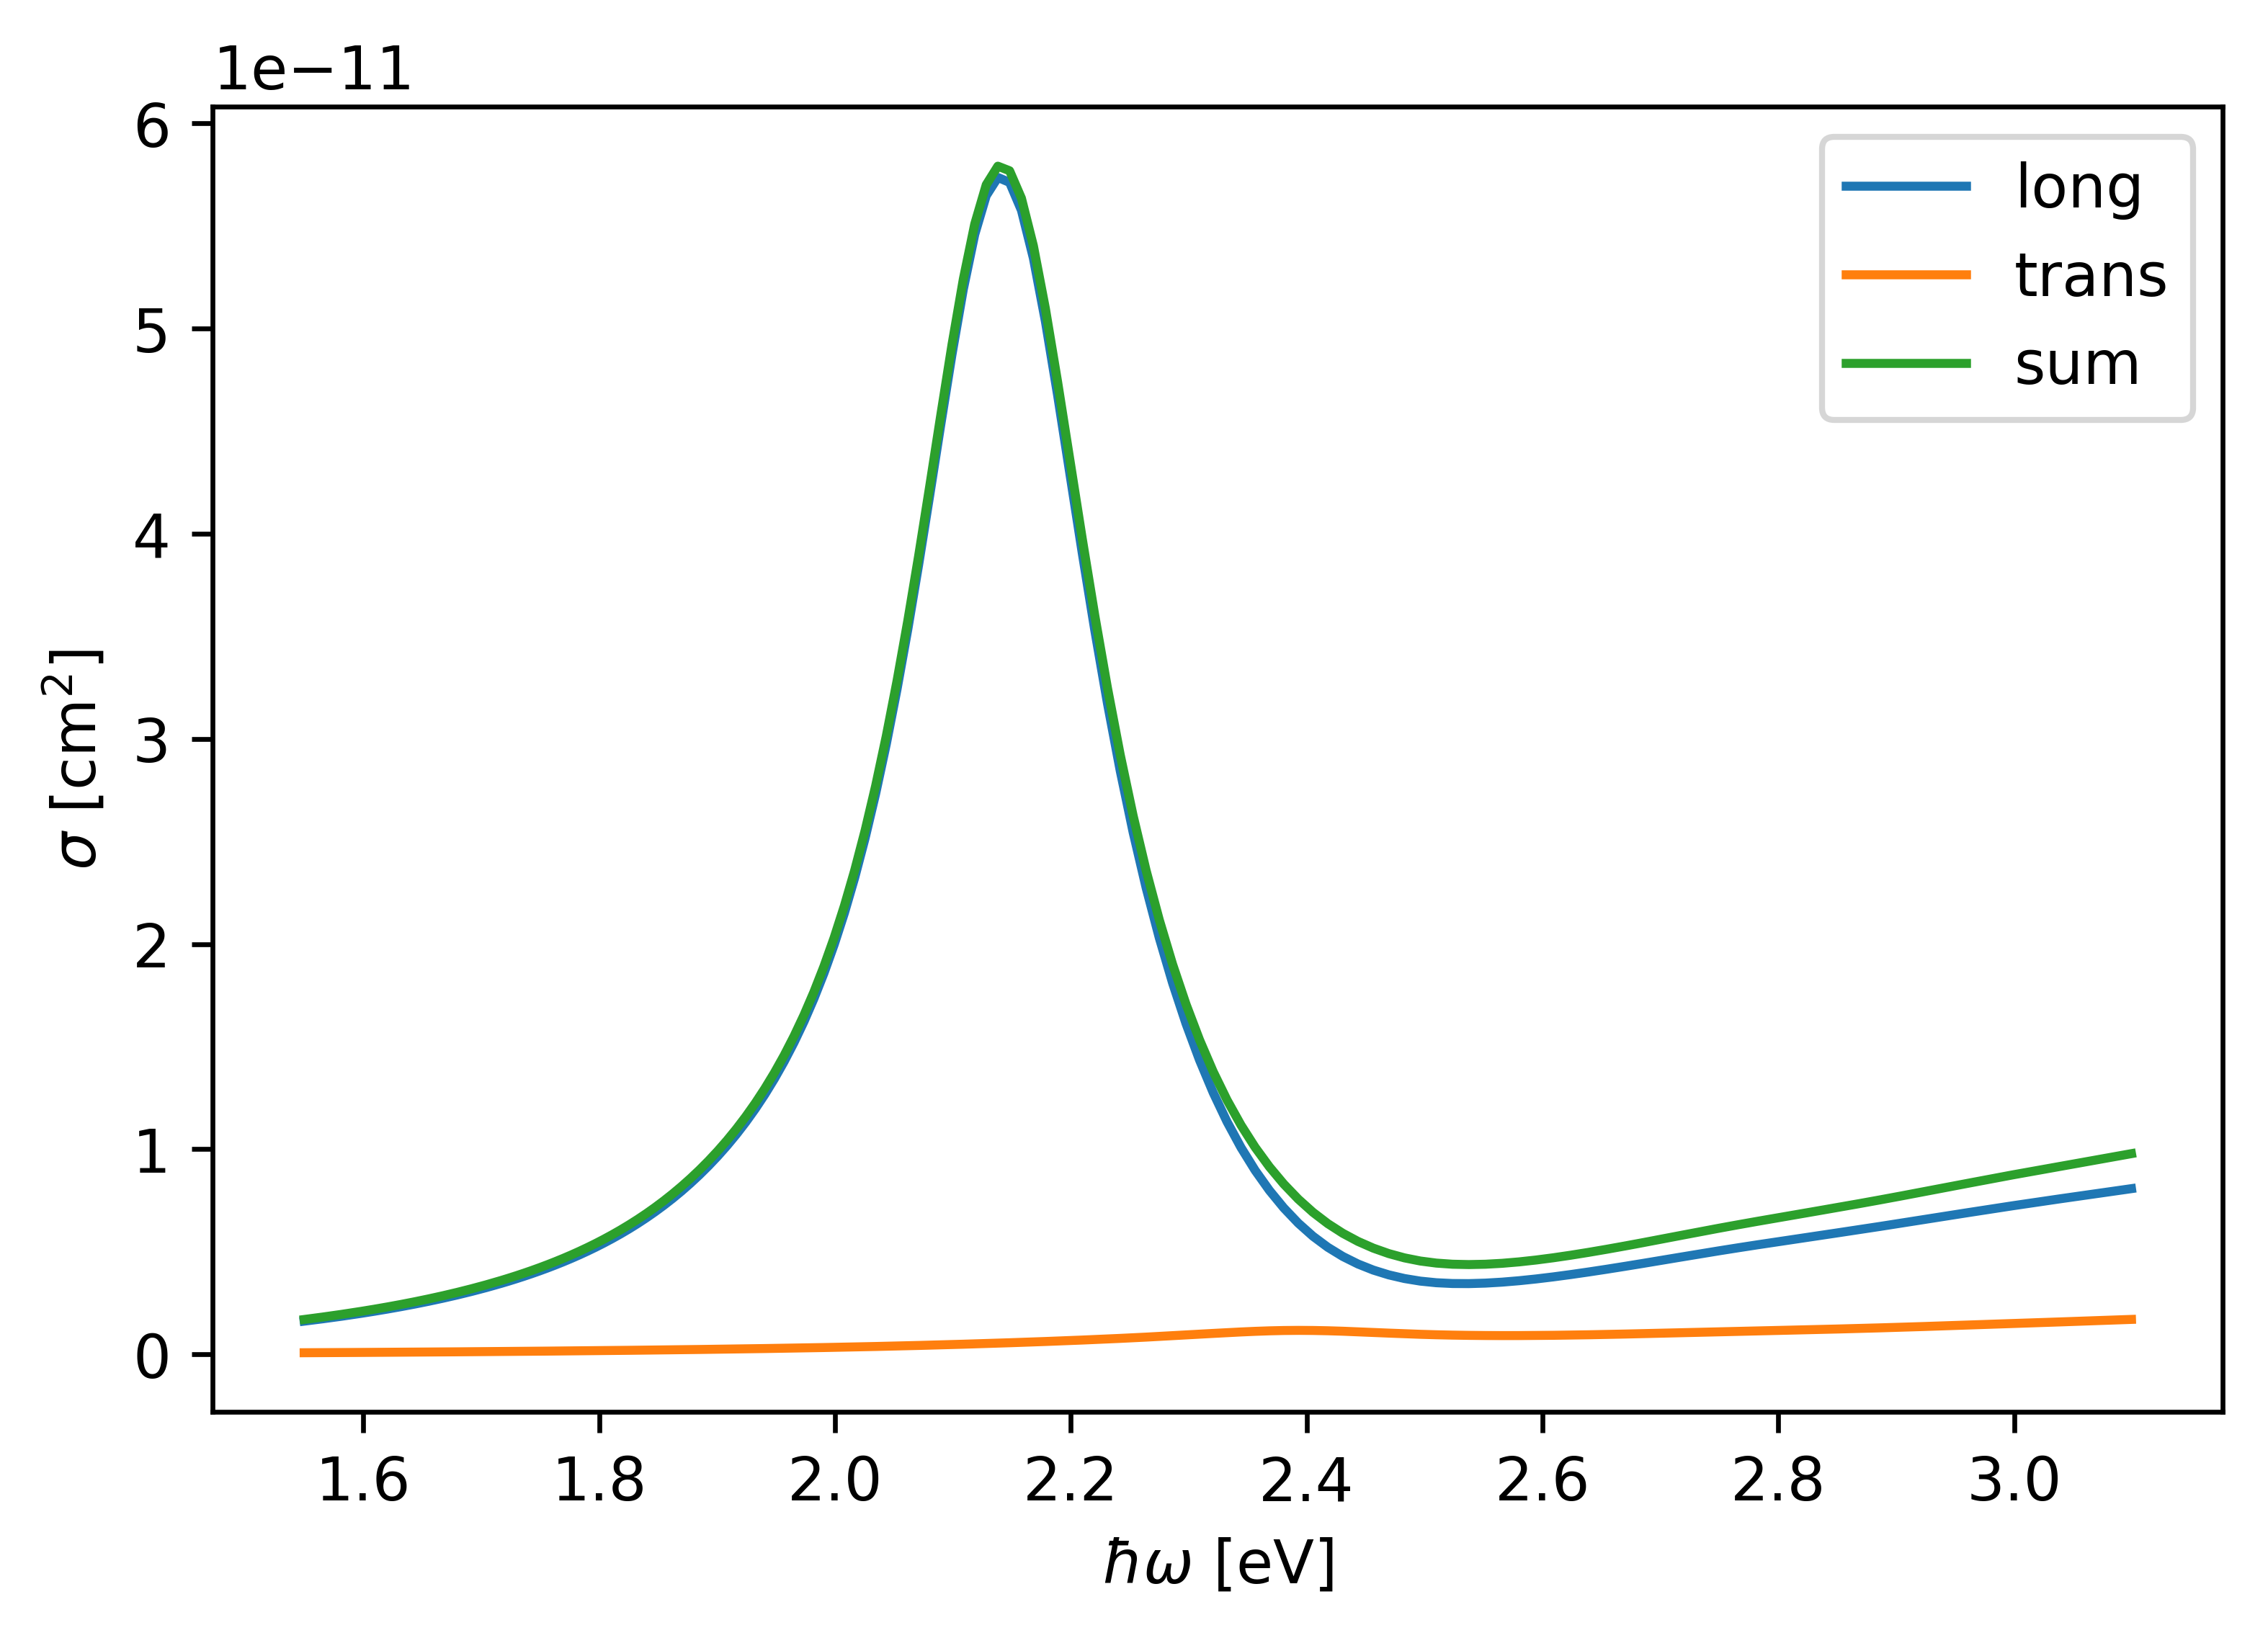

In [6]:
plt.figure(dpi=600)
plt.plot(long_lambdas,long_sigma, label='long')
plt.plot(trans_lambdas,trans_sigma, label='trans')
plt.plot(trans_lambdas, (long_sigma+trans_sigma), label='sum')
plt.xlabel(r'$\lambda$ [nm]')
plt.ylabel(r'$\sigma$ [cm$^2$]')
plt.legend()


plt.figure(dpi=600)
plt.plot(long_hbarws,long_sigma, label='long')
plt.plot(trans_hbarws,trans_sigma, label='trans')
plt.plot(trans_hbarws, (long_sigma+trans_sigma), label='sum')
plt.xlabel(r'$\hbar\omega$ [eV]')
plt.ylabel(r'$\sigma$ [cm$^2$]')
plt.legend()



# Plotting linearly polarized spectra from BEM, with $\epsilon_b = 1.778$


In [7]:
import numpy as np
import scipy.optimize as opt
import scipy.io as sio
import scipy.constants as con

# import matplotlib as mpl
import matplotlib.pyplot as plt

In [8]:
hbar = con.physical_constants['Planck constant over 2 pi in eV s'][0]
c = con.physical_constants['speed of light in vacuum'][0]*1e2 #cm/m
nm = 1e-7

In [9]:
## load matlab spectra with 
## sio.loadmat('fields_from_BEM')
path_to_BEM_spectra = '/Users/chair/Documents/MATLAB/102418/curly_rod_spectra_JC_epsb1p778'
loaded_spectra = sio.loadmat(path_to_BEM_spectra)

In [10]:
# loaded_spectra.keys()
loaded_spectra['long_mode'].shape

(150, 3)

In [11]:
long_sigma = loaded_spectra['long_mode'][:,1]*(1e-14) ## cm^2/nm^2
trans_sigma = loaded_spectra['trans_mode'][:,1]*(1e-14)

long_lambdas = loaded_spectra['long_mode'][:,0]
trans_lambdas = loaded_spectra['trans_mode'][:,0]

long_hbarws = hbar*c*2*np.pi/(long_lambdas*1e-7) 
trans_hbarws = hbar*c*2*np.pi/(trans_lambdas*1e-7) 


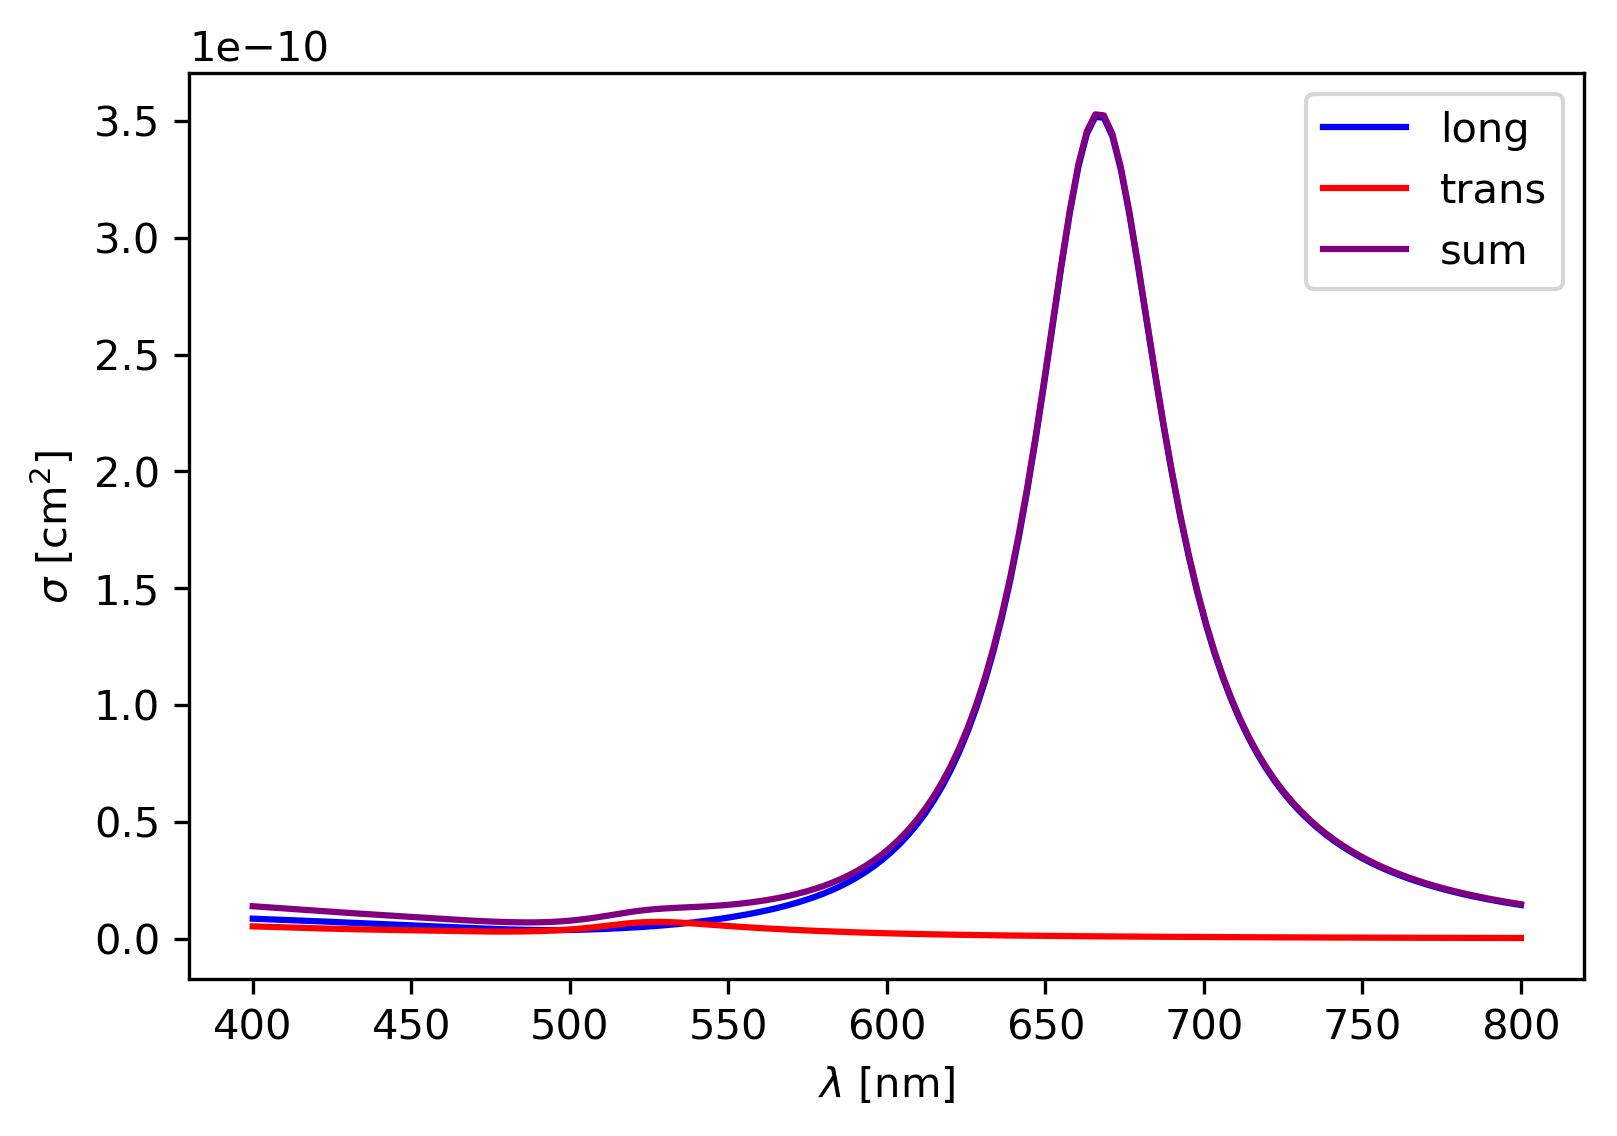

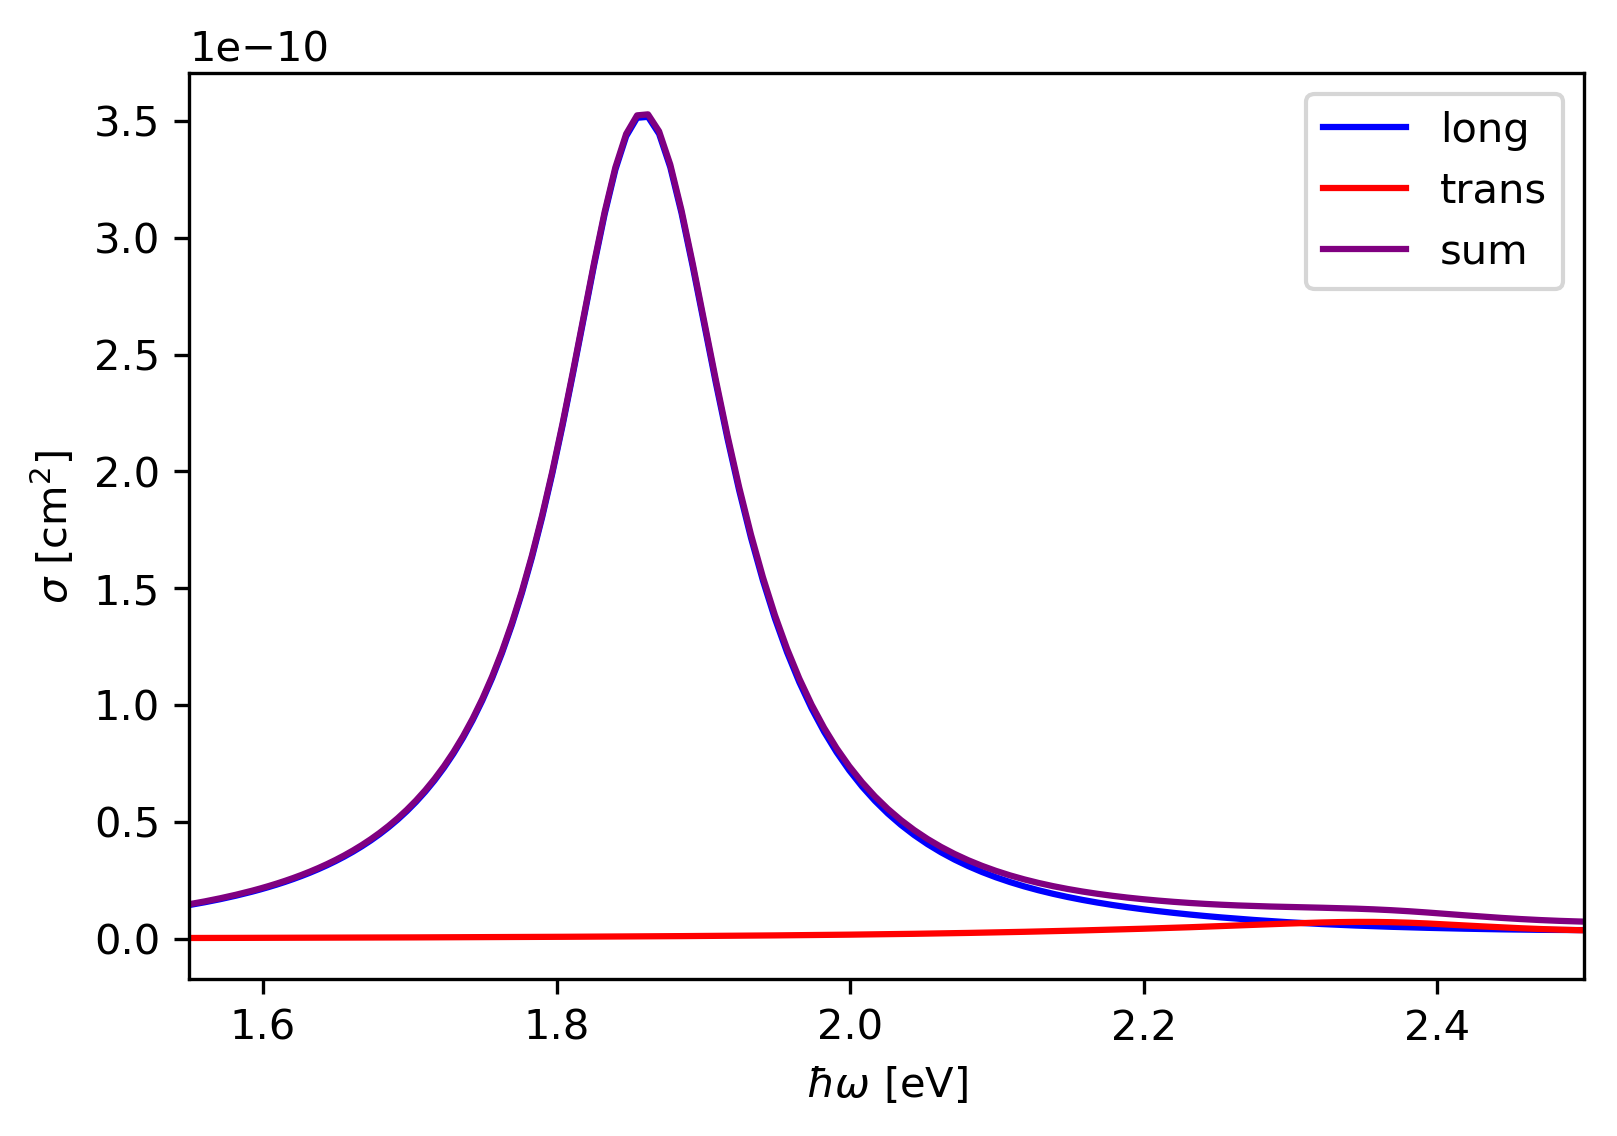

In [12]:
plt.figure(dpi=300)
plt.plot(long_lambdas,long_sigma, label='long', color = 'blue')
plt.plot(trans_lambdas,trans_sigma, label='trans',color = 'red')
plt.plot(trans_lambdas, (long_sigma+trans_sigma), label='sum', color='purple')
plt.xlabel(r'$\lambda$ [nm]')
plt.ylabel(r'$\sigma$ [cm$^2$]')
# plt.xlim([long_lambdas, 2.5])
plt.legend()


plt.figure(dpi=300)
plt.plot(long_hbarws,long_sigma, label='long', color = 'blue')
plt.plot(trans_hbarws,trans_sigma, label='trans',color = 'red')
plt.plot(trans_hbarws, (long_sigma+trans_sigma), label='sum', color='purple')
plt.xlabel(r'$\hbar\omega$ [eV]')
plt.xlim([np.min(long_hbarws), 2.5])
plt.ylabel(r'$\sigma$ [cm$^2$]')
plt.legend()


## Importing stuff to plot molecule spectra

In [13]:
from __future__ import print_function
from __future__ import division

import pdb
import sys
import os
import numpy as np
import scipy.optimize as opt
import scipy.io as sio
import scipy.special as spf
import yaml

## import diffrantion integral solver from Optics folder
work_dir = os.getcwd()
date_dir = os.path.split(work_dir)[0]
optics_folder = os.path.join(date_dir, 'Optics')
sys.path.append(optics_folder)
sys.path.append(date_dir)
import diffraction_int as diffi
import fibonacci as fib


## Import field functions
# field_module_folder = os.path.join(date_dir, 'field_functions')             
# sys.path.append(field_module_folder)
# import far_fields as fi

## Read parameter file to obtain fields
stream = open('../curly_param.yaml','r')
parameters = yaml.load(stream)


## plotting stuff
import matplotlib.pyplot as plt
import matplotlib as mpl
% matplotlib inline
# mpl.rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
## for Palatino and other serif fonts use:
#rc('font',**{'family':'serif','serif':['Palatino']})
mpl.rcParams['text.usetex'] = True

## colorbar stuff 
from mpl_toolkits import axes_grid1

# import eqm_slns as osc

## analytic image functions
# import analytic_intensity_functions_xyz as imf

## dipole moments as functions of separation, not pulled from param file
# import p_of_d_genOr as pod

# pretty fitting
# import lmfit as lf

import anal_foc_diff_fields as afi

import coupled_dipoles as cp 

## Import physical constants
full_path_to_constant_yaml = os.path.join(date_dir,'physical_constants.yaml')
opened_constant_file = open(full_path_to_constant_yaml,'r')
constants = yaml.load(opened_constant_file)
e = constants['physical_constants']['e']
c = constants['physical_constants']['c']  # charge of electron in statcoloumbs
hbar =constants['physical_constants']['hbar']
nm = constants['physical_constants']['nm']
n_a = constants['physical_constants']['nA']   # Avogadro's number
# Z_o = 376.7303 # impedence of free space in ohms (SI)

## System background
n_b = parameters['general']['background_ref_index']
eps_b = n_b**2.

a = parameters['plasmon']['radius']
#######################################################################
## simulated image 
sensor_size = 2000*nm
# height = 2*mm  # also defines objective lens focal length 
height = .2
resolution = 100  # image grid resolution

norm_style = 'per fig'  # 'per fig' or 'across figs'

show_or_save = 'show'
# show_or_save = raw_input('( show / save ) figures? ')

file_extension = 'pdf'  # 'pdf' for mest quality

## plot parameters
plot_scale = 1/nm

#######################################################################
## Optics stuff.  

## Build image sensor
eye = diffi.observation_points(
    x_min= -sensor_size/2, 
    x_max= sensor_size/2,
    y_min= -sensor_size/2, 
    y_max= sensor_size/2, 
    points= resolution
    )

## Experimental parameters
magnification = 1
numerical_aperture = 1
max_theta = np.arcsin(numerical_aperture) # defines physical aperture size

## numerical parameters for calculation of scattered field
lens_points = 1000

# obj_f = 1.*mm  # still dont know what this is supposed to be
obj_f = height

tube_f = magnification * obj_f

## calculate dipole magnitudes
drive_hbar_omega = 1.86 ## rod long mode max at 1.8578957289256757 eV
omega_drive = drive_hbar_omega/hbar  # driving frequency

reading parameters from ../curly_param.yaml
polarizability reduced by factor of 1
coupling scaled up by by factor of 1


In [14]:
fit_result_params = (
    ## eps_inf, hbar*omega_p, hbar*gamma_nr, eps_b (not used as fit param), a_x, a_yz
    15.100176  , 10.15232758/hbar,  0.10316881/hbar, 1.0, 67.24906658*nm, 19.20816015*nm
    )
alpha0_diag_dyad = cp.sparse_polarizability_tensor(
    mass=cp.fluorophore_mass(
        ext_coef=parameters['fluorophore']['extinction_coeff'], 
        gamma=parameters['fluorophore']['mass_gamma']/hbar
        ), 
    w_res=drive_hbar_omega/hbar, 
    w=drive_hbar_omega/hbar, 
    gamma_nr=parameters['fluorophore']['test_gamma']/hbar,
    a=0, 
    eps_inf=1, 
    ebs_b=1
    )
alpha1_diag_dyad = cp.sparse_ret_prolate_spheroid_polarizability_Drude(
        omega_drive, *fit_result_params)
# alpha1_diag_dyad_no_trans = alpha1_diag_dyad
# alpha1_diag_dyad_no_trans[1,1] = 0
# alpha1_diag_dyad_no_trans[2,2] = 0


In [15]:
import spectra as spe
def alpha0_of_hbarw(hbarw):
    alpha0_diag_dyad = cp.sparse_polarizability_tensor(
        mass=cp.fluorophore_mass(
            ext_coef=parameters['fluorophore']['extinction_coeff'], 
            gamma=parameters['fluorophore']['mass_gamma']/hbar
            ), 
        w_res=drive_hbar_omega/hbar, 
        w=hbarw/hbar, 
        gamma_nr=parameters['fluorophore']['test_gamma']/hbar,
        a=0, 
        eps_inf=1, 
        ebs_b=1
        )
    return alpha0_diag_dyad

enies = np.arange(1.5, 2.6, 0.001)
mol_spectra = spe.generalized_single_dip_scat_spec(alpha0_of_hbarw, energies=enies)
# long_rod_spectra = 

reading parameters from ../curly_param.yaml
../curly_param.yaml
given even number of points for Fibonacci lattice, 
  adding 1...


Text(0.5,1,'unnormalized')

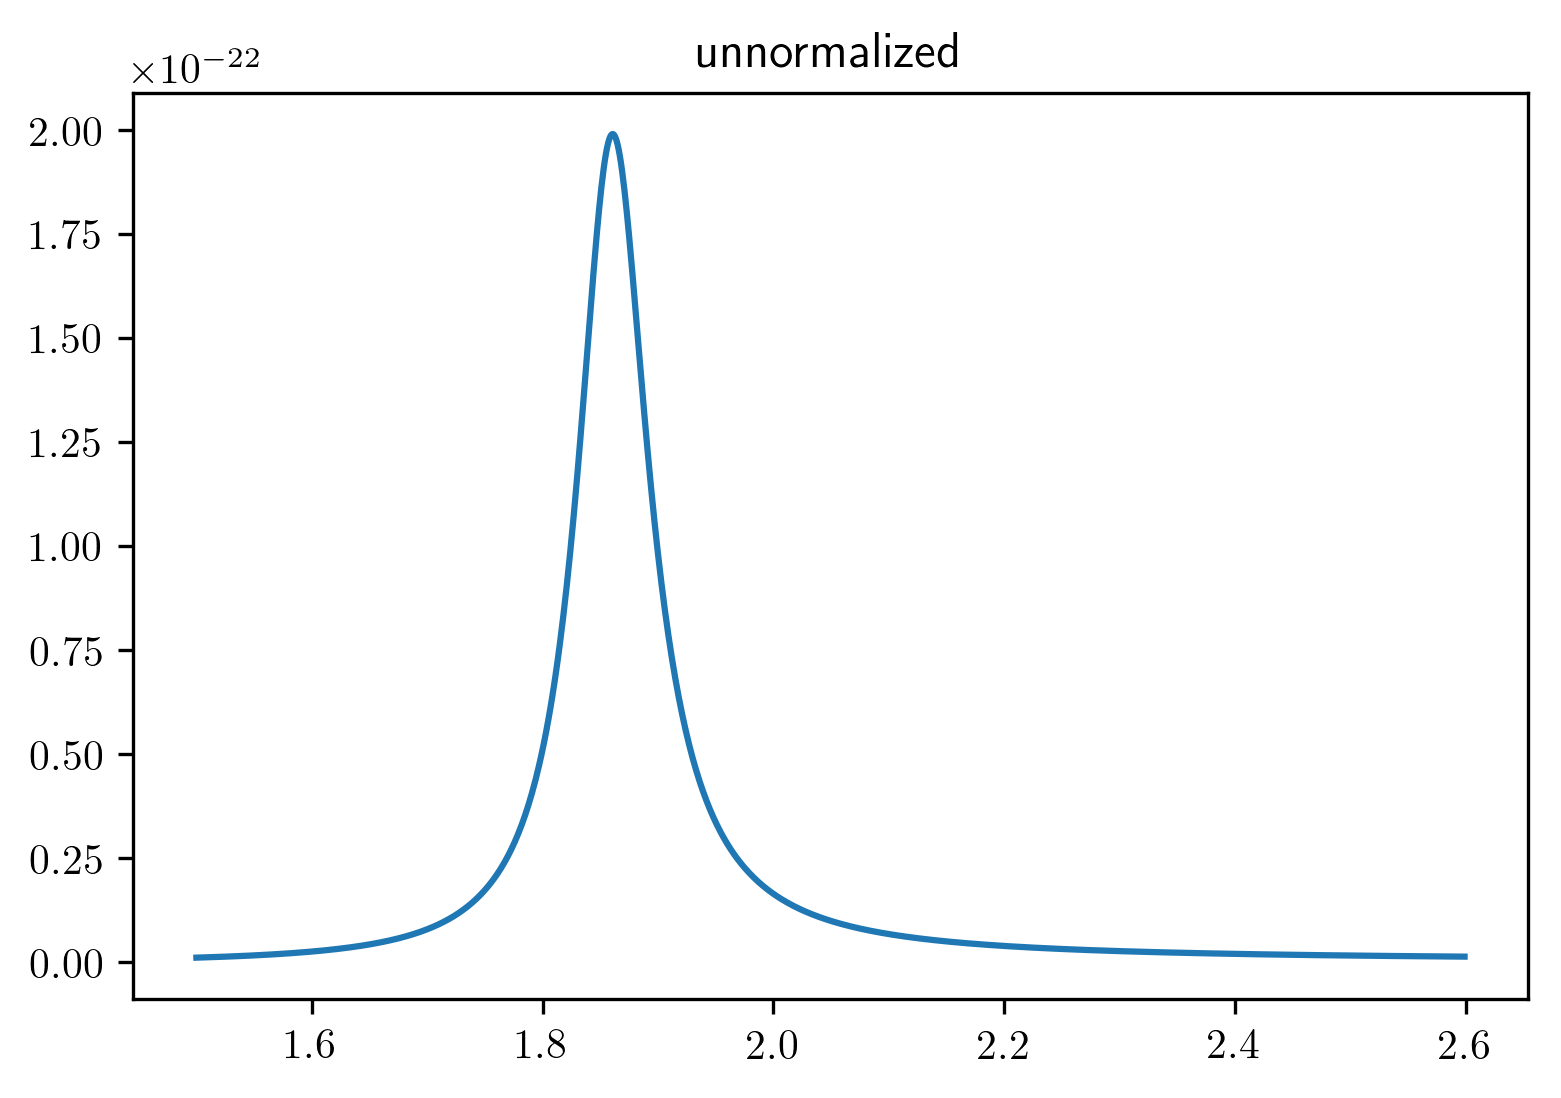

In [16]:

plt.figure(dpi=300)
plt.plot(mol_spectra[0],mol_spectra[1].T)
plt.title('unnormalized')

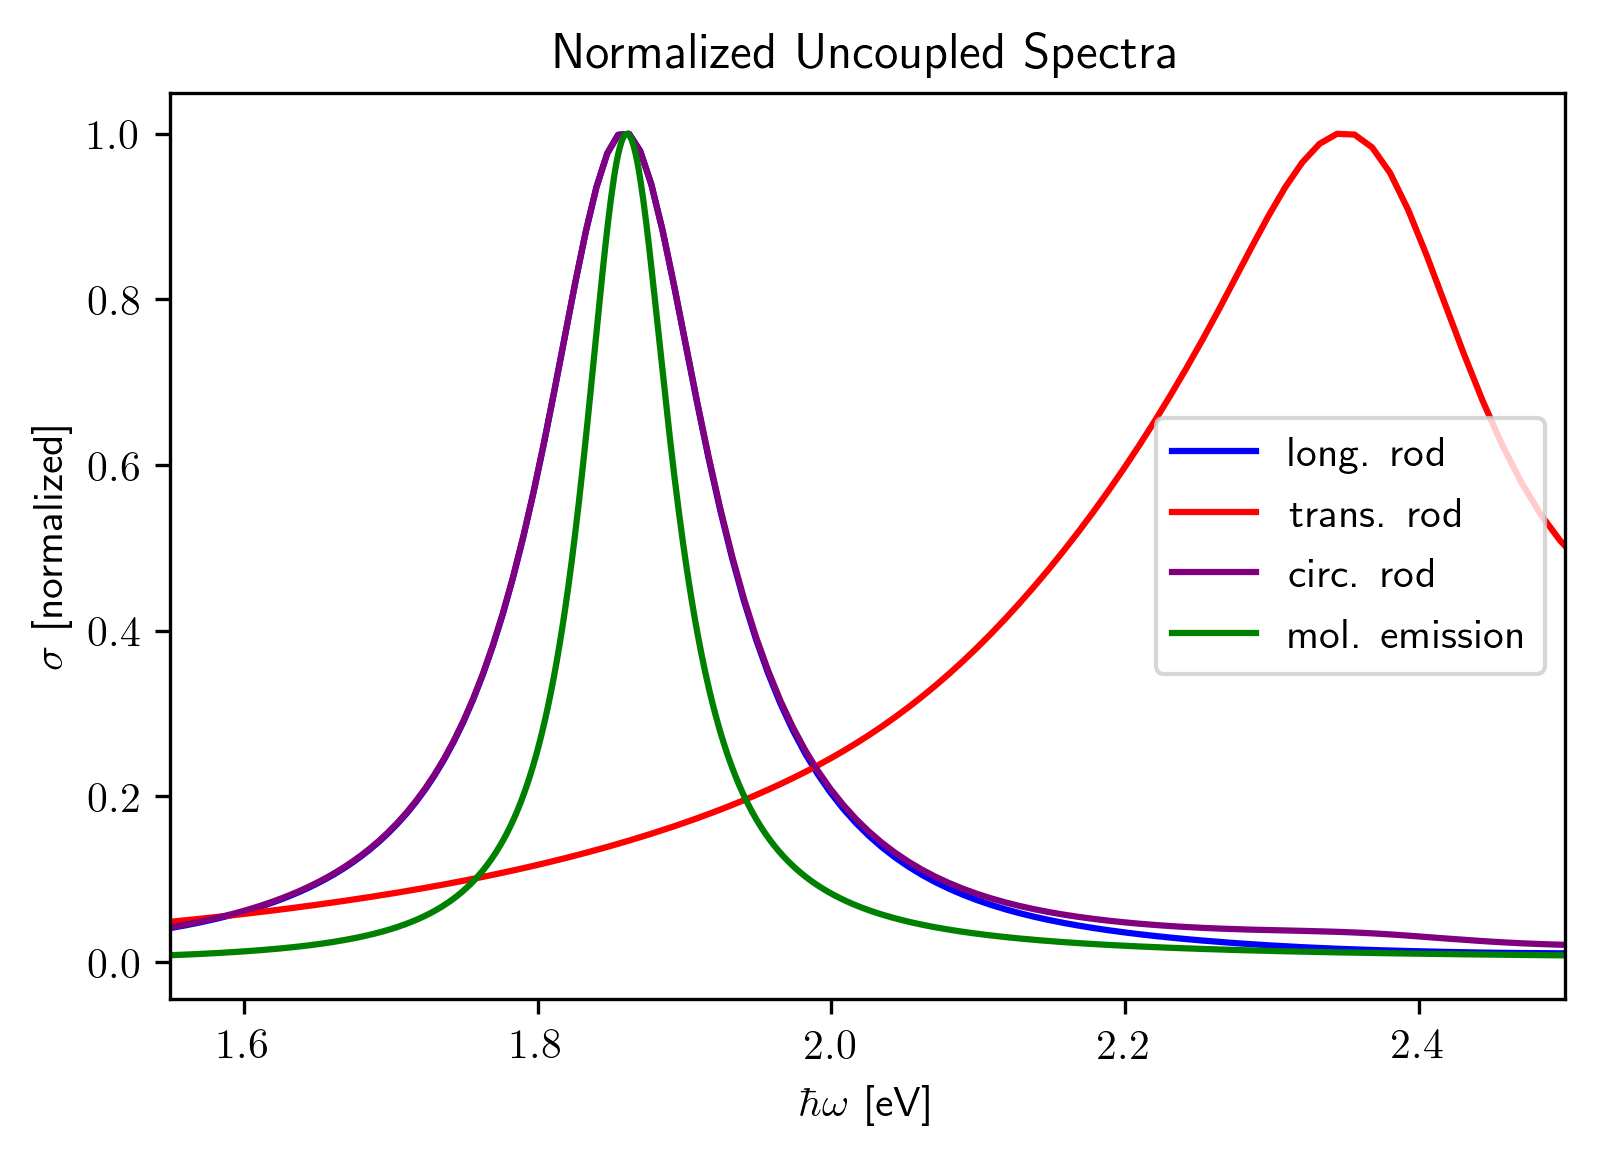

In [17]:

plt.figure(dpi=300)
plt.plot(long_hbarws,long_sigma/np.max(long_sigma), label='long. rod', color = 'blue')
plt.plot(trans_hbarws,trans_sigma/np.max(trans_sigma), label='trans. rod',color = 'red')
plt.plot(trans_hbarws, 
         (long_sigma+trans_sigma)/np.max((long_sigma+trans_sigma)), 
         label='circ. rod', color='purple')
plt.plot(mol_spectra[0],mol_spectra[1].T/np.max(mol_spectra[1].T), color='green', label='mol. emission')
plt.xlabel(r'$\hbar\omega$ [eV]')
plt.xlim([np.min(long_hbarws), 2.5])
plt.ylabel(r'$\sigma$ [normalized]')
plt.title(r'Normalized Uncoupled Spectra')
plt.legend()

### But that is plotting simulation data for the rod, really I want fits

In [18]:
result=np.array([15.100176  , 10.15232758,  0.10316881, 67.24906658, 19.20816015])

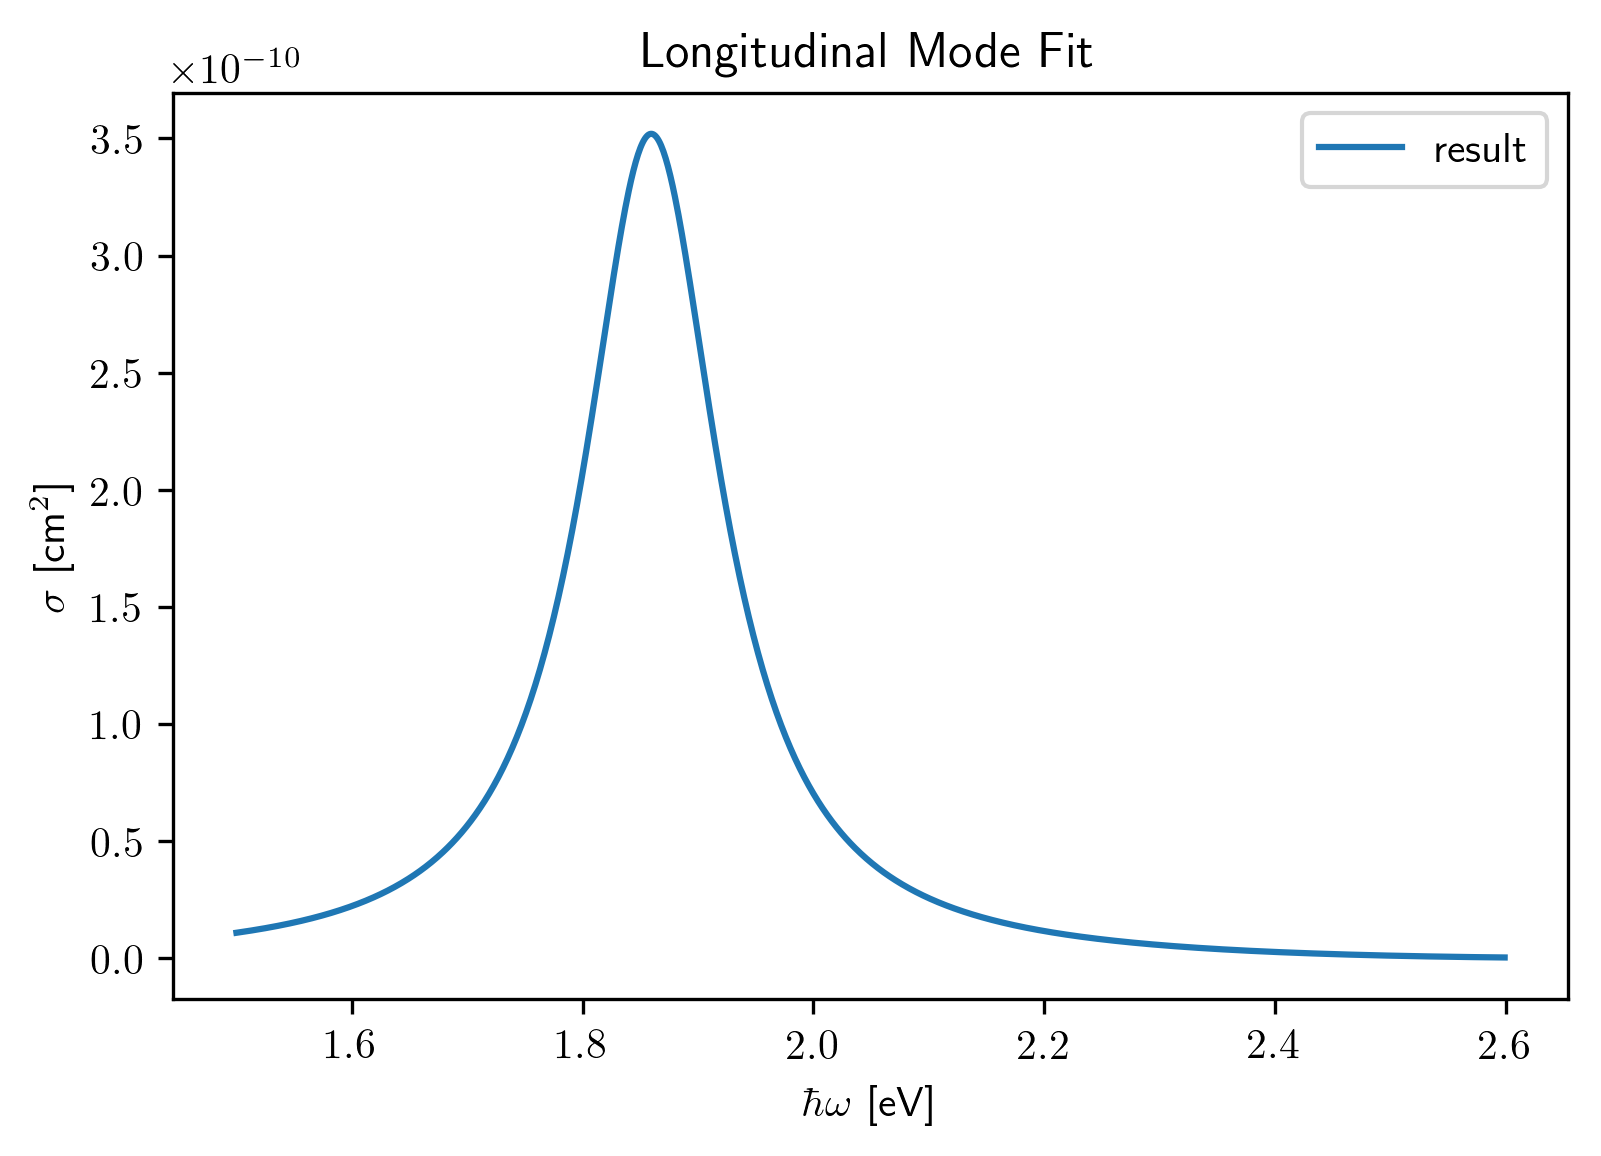

In [19]:
def ret_fit_scat_1(hbarw, eps_inf, hbarw_p, hbargamma, a_1, a_2):
    return cp.long_sigma_scat_ret_pro_ellip(hbarw/hbar, eps_inf, hbarw_p/hbar, hbargamma/hbar, 1., a_1*nm, a_2*nm)*1e10
def ret_fit_scat_2(hbarw, eps_inf, hbarw_p, hbargamma, a_1, a_2):
    return cp.short_sigma_scat_ret_pro_ellip(hbarw/hbar, eps_inf, hbarw_p/hbar, hbargamma/hbar, 1., a_1*nm, a_2*nm)*1e10

plt.figure(dpi=300)
# plt.plot(x1,y1,label='data')
# plt.plot(x1,ret_fit_scat_1(x1,*ini_guess_both)*1e-10,label='initial')
plt.plot(enies,ret_fit_scat_1(enies,*result)*1e-10,label='result')
# plt.xlim([np.min(x1),np.max(x2)])
plt.xlabel(r'$\hbar\omega$ [eV]')
plt.ylabel(r'$\sigma$ [cm$^2$]')
plt.title(r'Longitudinal Mode Fit')
plt.legend()

# plt.figure(dpi=300)
# plt.plot(x2,y2,label='data')
# plt.plot(x2,ret_fit_scat_2(x2,*ini_guess_both)*1e-10,label='initial')
# plt.plot(x2,ret_fit_scat_2(x2,*result['x'])*1e-10,label='result')
# plt.xlim([np.min(x1),np.max(x2)])
# plt.xlabel(r'$\hbar\omega$ [eV]')
# plt.ylabel(r'$\sigma$ [cm$^2$]')
# plt.title(r'Transverse Mode Fit')
# plt.legend()

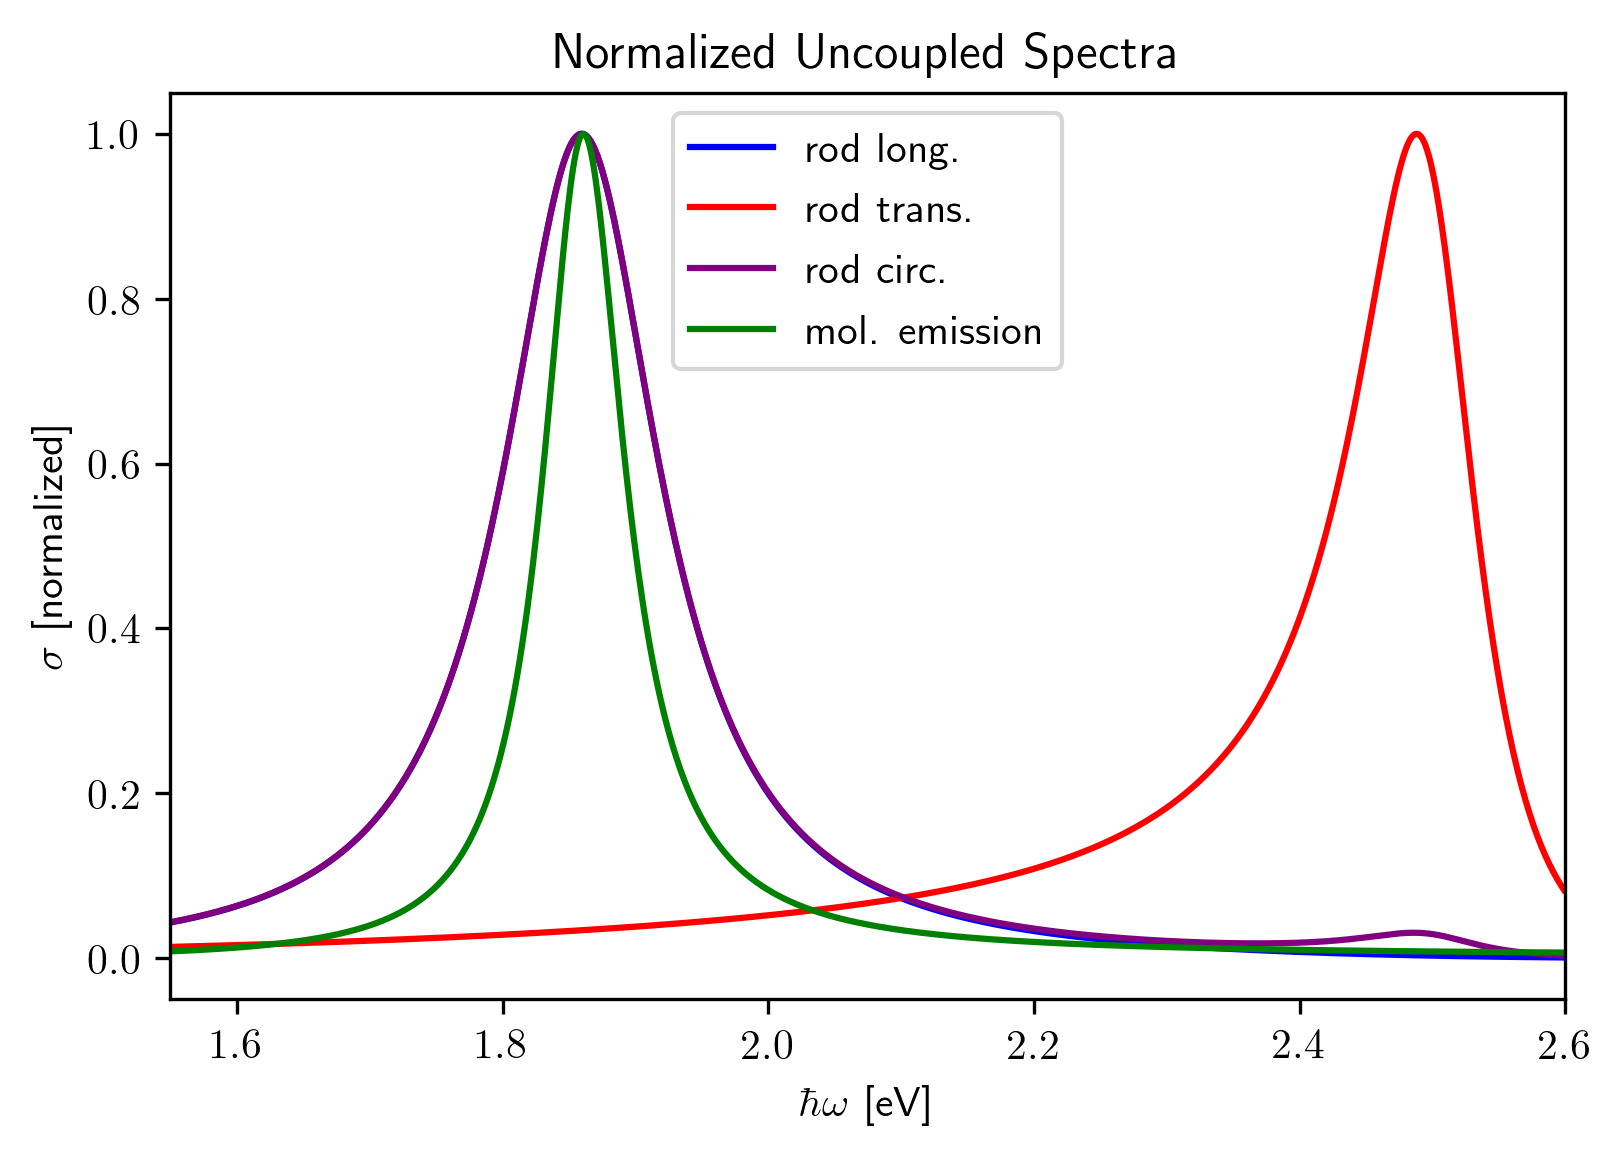

In [20]:
long_rod_spectra_fit = ret_fit_scat_1(enies,*result)
tran_rod_spectra_fit = ret_fit_scat_2(enies,*result)
sum_spec = (tran_rod_spectra_fit+long_rod_spectra_fit)

plt.figure(dpi=300)
plt.plot(enies,
         long_rod_spectra_fit/np.max(long_rod_spectra_fit), 
         label='rod long.', color = 'blue')
plt.plot(enies,tran_rod_spectra_fit/np.max(tran_rod_spectra_fit), 
         label='rod trans.',color = 'red')
plt.plot(enies, 
         sum_spec/np.max(sum_spec), label='rod circ.', color='purple')
plt.plot(mol_spectra[0],mol_spectra[1].T/np.max(mol_spectra[1].T), color='green', label='mol. emission')
plt.xlabel(r'$\hbar\omega$ [eV]')
plt.xlim([np.min(long_hbarws), 2.6])
plt.ylabel(r'$\sigma$ [normalized]')
plt.title(r'Normalized Uncoupled Spectra')

# plt.plot(enies,ret_fit_scat_1(enies,*result)*1e-10,label='result')

plt.legend()

# 10/30/18
## Time to move the molecule over to the transverse mode

In [23]:
trans_drive_hbar_omega = enies[np.argmax(tran_rod_spectra_fit)]

def alpha0_of_hbarw_trans_res(hbarw):
    alpha0_diag_dyad = cp.sparse_polarizability_tensor(
        mass=cp.fluorophore_mass(
            ext_coef=parameters['fluorophore']['extinction_coeff'], 
            gamma=parameters['fluorophore']['mass_gamma']/hbar
            ), 
        w_res=trans_drive_hbar_omega/hbar, 
        w=hbarw/hbar, 
        gamma_nr=parameters['fluorophore']['test_gamma']/hbar,
        a=0, 
        eps_inf=1, 
        ebs_b=1
        )
    return alpha0_diag_dyad

mol_spectra = spe.generalized_single_dip_scat_spec(alpha0_of_hbarw_trans_res, energies=enies)
# long_rod_spectra = 

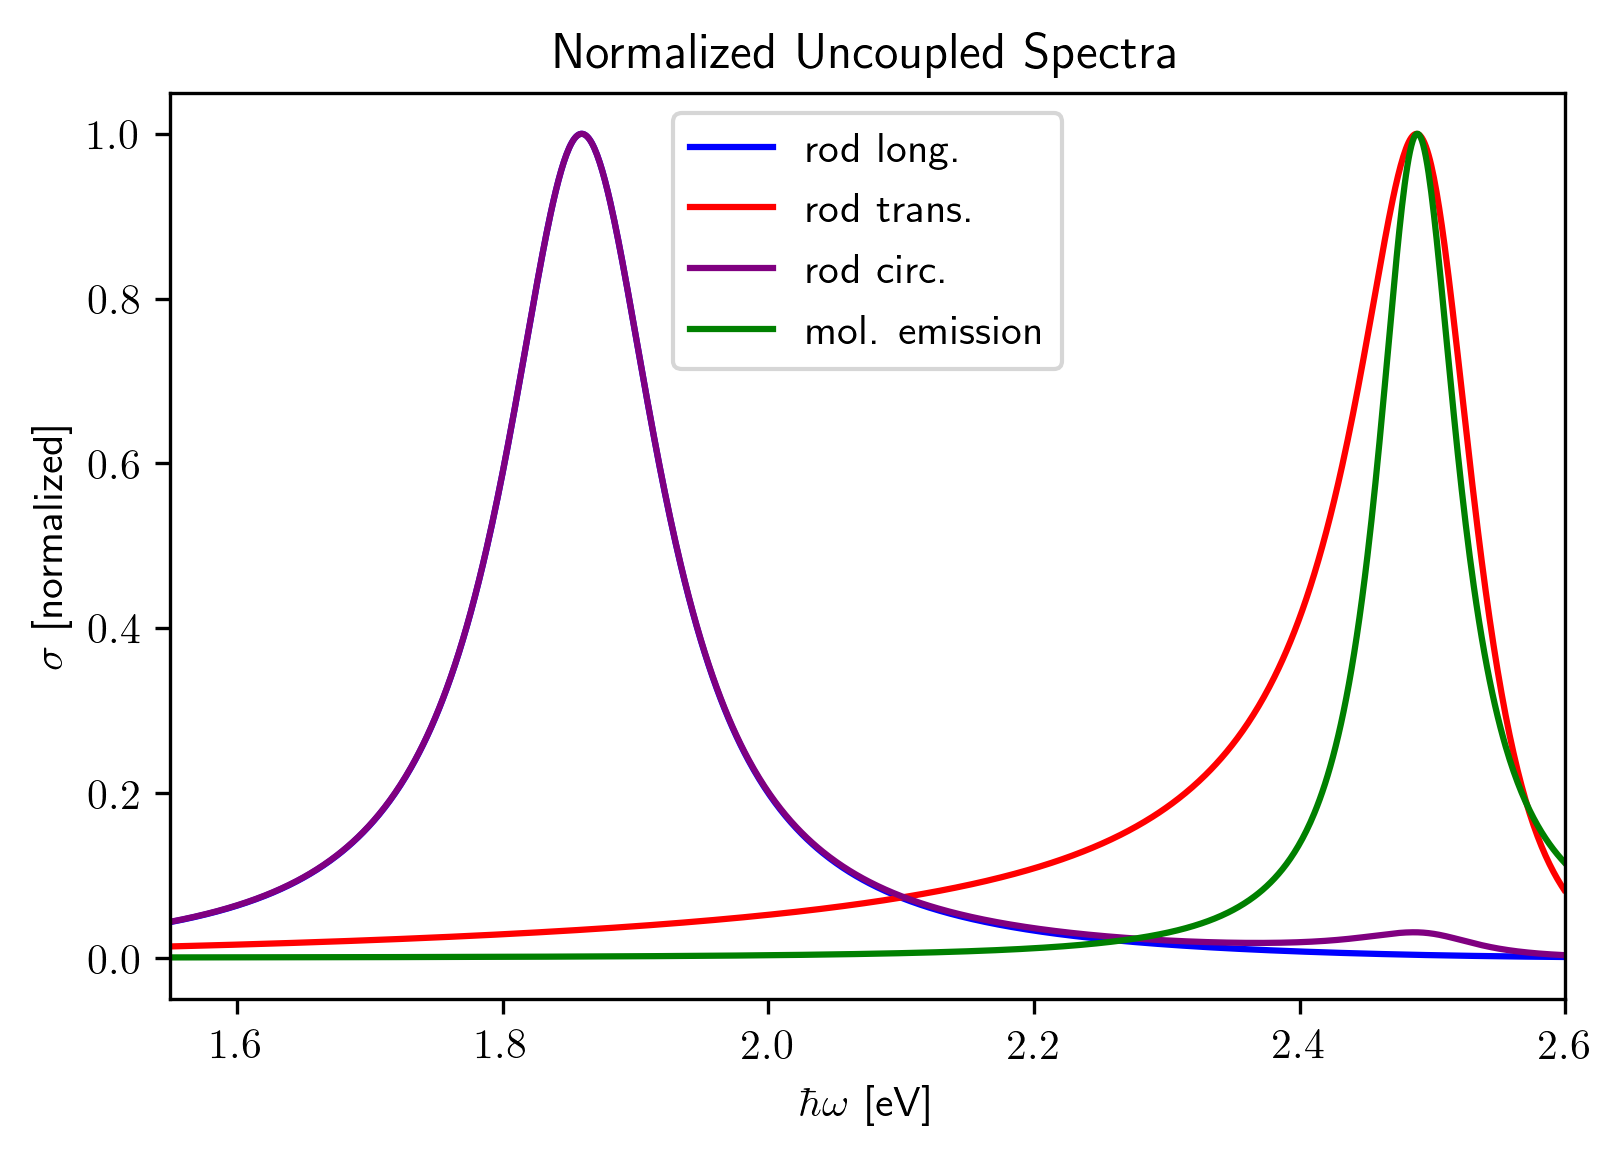

In [29]:
long_rod_spectra_fit = ret_fit_scat_1(enies,*result)
tran_rod_spectra_fit = ret_fit_scat_2(enies,*result)
sum_spec = (tran_rod_spectra_fit+long_rod_spectra_fit)

plt.figure(dpi=300)
plt.plot(enies,
         long_rod_spectra_fit/np.max(long_rod_spectra_fit), 
         label='rod long.', color = 'blue')
plt.plot(enies,tran_rod_spectra_fit/np.max(tran_rod_spectra_fit), 
         label='rod trans.',color = 'red')
plt.plot(enies, 
         sum_spec/np.max(sum_spec), label='rod circ.', color='purple')
plt.plot(mol_spectra[0],mol_spectra[1].T/np.max(mol_spectra[1].T), color='green', label='mol. emission')
plt.xlabel(r'$\hbar\omega$ [eV]')
plt.xlim([np.min(long_hbarws), 2.6])
plt.ylabel(r'$\sigma$ [normalized]')
plt.title(r'Normalized Uncoupled Spectra')

# plt.plot(enies,ret_fit_scat_1(enies,*result)*1e-10,label='result')

plt.legend()

In [27]:
enies[np.argmin((long_rod_spectra_fit-tran_rod_spectra_fit)**2.)]

2.3769999999999034

In [28]:
trans_drive_hbar_omega

2.487999999999891